In [ ]:
#Import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score

In [ ]:
#Download the data
url = '/content/wind_dataset.csv'
df = pd.read_csv(url)
df.head()

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


In [ ]:
df = df.dropna()

# Convert the 'DATE' column to datetime object and extract numerical features
df['DATE'] = pd.to_datetime(df['DATE'])
df['YEAR'] = df['DATE'].dt.year
df['MONTH'] = df['DATE'].dt.month
df['DAY'] = df['DATE'].dt.day

# Now drop the original 'DATE' column
X = df.drop(columns=['WIND', 'DATE'])  # Exclude 'DATE' from features
y = df['WIND']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 22.11419599327747
R-squared: 0.13129674927072899


In [ ]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train_poly, y_train)

y_pred_poly = poly_reg_model.predict(X_test_poly)
print("Polynomial Regression Performance")
print("MSE:", mean_squared_error(y_test, y_pred_poly))
print("R²:", r2_score(y_test, y_pred_poly))

Polynomial Regression Performance
MSE: 1.0111431022001793e+20
R²: -3.97203362085059e+18


In [ ]:
#Fine-Tune the Model
rf_model = RandomForestRegressor()

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predict and evaluate
y_pred_best = best_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Best Mean Squared Error: {mse_best}")
print(f"Best R-squared: {r2_best}")

Best Mean Squared Error: 18.876484242458304
Best R-squared: 0.25848250468846967


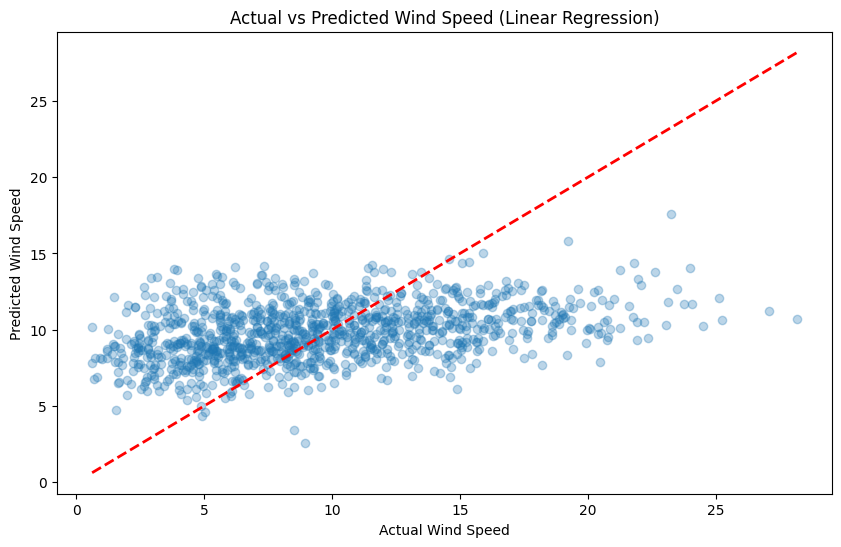

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Wind Speed')
plt.ylabel('Predicted Wind Speed')
plt.title('Actual vs Predicted Wind Speed (Linear Regression)')
plt.show()

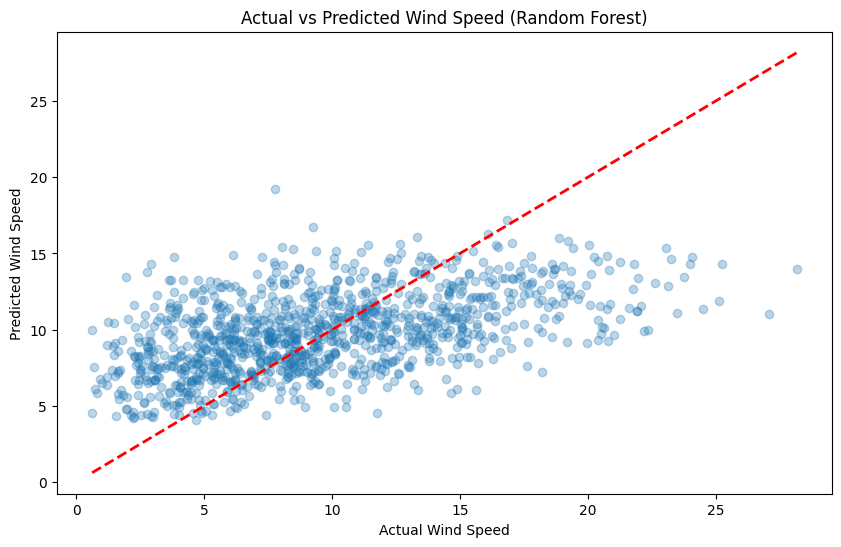

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Wind Speed')
plt.ylabel('Predicted Wind Speed')
plt.title('Actual vs Predicted Wind Speed (Random Forest)')
plt.show()

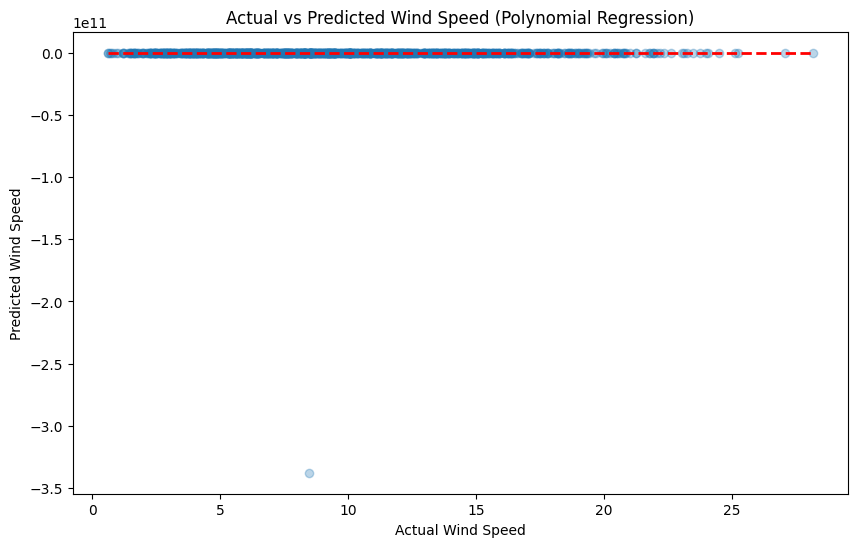

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poly, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Wind Speed')
plt.ylabel('Predicted Wind Speed')
plt.title('Actual vs Predicted Wind Speed (Polynomial Regression)')
plt.show()

In [ ]:
# Feature Engineering: Example for extracting more features from date
df['DATE'] = pd.to_datetime(df['DATE'])
df['hour'] = df['DATE'].dt.hour
df['day_of_week'] = df['DATE'].dt.dayofweek

# Drop the original date column
df = df.drop('DATE', axis=1)

# Ensure all features are numerical
df = pd.get_dummies(df)

# Define features and target
X = df.drop(columns=['WIND'])
y = df['WIND']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Evaluate the model using cross-validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)
print(f'Cross-Validation RMSE: {cv_rmse.mean()}')

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Cross-Validation RMSE: 4.272849196869471
Mean Squared Error: 18.710349168198555
R-squared: 0.2650087233723172
